In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils import clip_grad_norm_
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, f1_score, accuracy_score
from tqdm import tqdm_notebook as tqdm
import torchnet as tnt
#from keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline 
from deep_models import *
import seaborn as sns
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
np.random.seed(42)

Using CNTK backend


using gpu


In [2]:
model_name = 'Esim'
vecs = pickle.load(open('./tmp/pretrained.pkl', 'rb'))
if model_name == 'EmbeddingBag':
    model = EmbeddingBag(vecs).cuda()
elif model_name == 'CE':
    model = CE(vecs).cuda()
elif model_name == 'IE':
    model = IE(vecs).cuda()
elif model_name == 'Esim':
    model = Esim(vecs).cuda()
elif model_name == 'Dattn':
    model = Dattn(vecs).cuda()
elif model_name == 'Declare':
    model = Declare(vecs).cuda()

In [3]:
def check_attn(model, data_iter, batch_num=1):
    model.eval()
    ct = 1
    with torch.no_grad():
        for headlines, bodies, labels in tqdm(data_iter):
            headlines = torch.from_numpy(headlines).cuda().long()
            bodies = torch.from_numpy(bodies).cuda().long()
            _, attn1, attn2 = model(headlines, bodies)
            if ct == batch_num:
                return headlines.cpu().numpy(), bodies.cpu().numpy(), attn1.cpu().numpy(), attn2.cpu().numpy()
            ct += 1

In [9]:
model.load_state_dict(torch.load('./models/Esim_10_0.069'))
batch_num = 30
h, b, attn1, attn2 = check_attn(model, get_batch('./tmp/train_ids.pkl', batch_size=64, max_len_b=100), batch_num)

word2id = pickle.load(open('./tmp/word2id.pkl', 'rb'))
id2word = dict(zip(word2id.values(), word2id.keys()))
def get_heatmap(attn1, h, b, id2word, num=0):
    headline = [id2word.get(x, 'padding') for x in h[num]]
    body = [id2word.get(x, 'padding') for x in b[num]]
#     print(headline)
#     print(body)
    sns.heatmap(attn1[num], yticklabels=headline, xticklabels=body)
    plt.show()

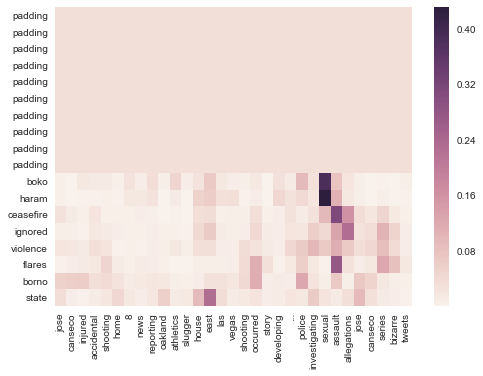

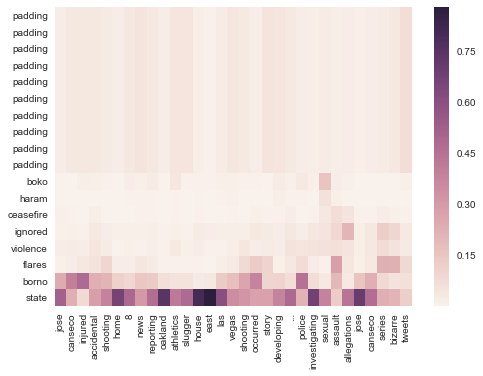

(64, 18, 31)

In [10]:
pair_num = 1
get_heatmap(attn1, h, b, id2word, pair_num)
get_heatmap(attn2, h, b, id2word, pair_num)
attn1.shape